<a href="https://colab.research.google.com/github/NiceSoyce/DS_Lab2/blob/main/robert_thibault_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse en Composantes Principales (ACP)

## Partie 1 : Analyse du dataset *decathlon*

---
### 1. Préparation des donneés

**1. Variables quantitatives à inclure dans l’analyse :**

- 100m  
- Long.jump  
- Shot.put  
- High.jump  
- 400m  
- 110m.hurdle  
- Discus  
- Pole.vault  
- Javeline  
- 1500m  
- Points  

Les colonnes `Athlets`, `Rank`, et `Competition` ne sont pas quantitatives continues :  
- `Athlets` et `Competition` sont qualitatives (noms, catégories).  
- `Rank` est un rang (ordinal, mais pas une mesure de performance continue).

---

**2. Vérifier si les données nécessitent un centrage et une réduction :**

Oui, il faut centrer et réduire les variables quantitatives.  
**Pourquoi ?**  
Les variables sont mesurées dans des unités différentes (secondes, mètres, points, etc.). Sans standardisation, les variables à grande échelle (ex : Points, 1500m) domineraient l’analyse.

---

**3. Justification des choix :**

- On sélectionne uniquement les variables quantitatives continues pour l’ACP, car l’ACP analyse les corrélations entre variables numériques.
- On centre et réduit les données pour donner le même poids à chaque variable, quelle que soit son unité ou son échelle.

---

### 2. Initialisation du ACP

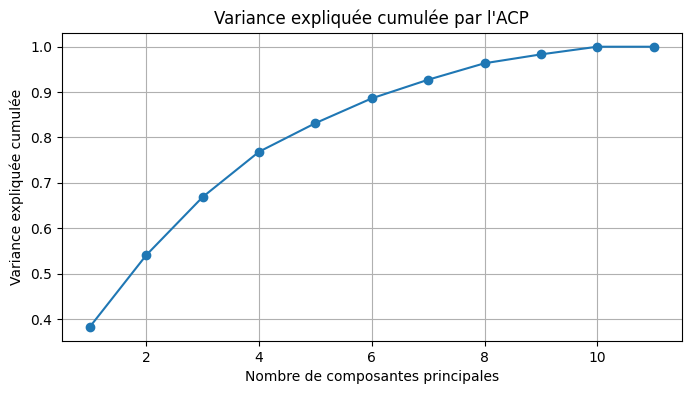

Nombre de composantes principales à conserver pour expliquer au moins 85% de la variance : 6


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Charger les données
df = pd.read_csv("decathlon.csv")

# Sélectionner les variables quantitatives
quant_vars = ['100m', 'Long.jump', 'Shot.put', 'High.jump', '400m', '110m.hurdle',
              'Discus', 'Pole.vault', 'Javeline', '1500m', 'Points']
X = df[quant_vars]

# Centrer et réduire les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réaliser l'ACP
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Afficher la variance expliquée cumulée
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8,4))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée cumulée par l\'ACP')
plt.grid(True)
plt.show()

# Choix du nombre de dimensions à conserver
# Ici, on choisit le nombre de composantes qui explique au moins 85% de la variance
k = np.argmax(cumulative_variance >= 0.85) + 1
print(f"Nombre de composantes principales à conserver pour expliquer au moins 85% de la variance : {k}")

# Motiver le choix :
# On conserve {k} dimensions car elles expliquent au moins 85% de la variance totale, ce qui permet de réduire la dimensionnalité tout en gardant l'essentiel de l'information.

### 3. Analyse de l'inertie

In [12]:
# Analyse de l'inertie expliquée par chaque axe principal
explained_var = pca.explained_variance_ratio_ * 100  # en pourcentage
cumulative_var = np.cumsum(explained_var)

# Affichage du pourcentage de variance expliquée par axe et cumulée
for i, (var, cum_var) in enumerate(zip(explained_var, cumulative_var), 1):
    print(f"Axe {i}: {var:.2f}% (cumulé: {cum_var:.2f}%)")

# Justification du nombre d'axes retenus
# On retient le nombre d'axes (k) pour lequel la variance cumulée dépasse 80% (ou un seuil choisi).
print(f"\nOn retient {k} axes principaux car ils expliquent {cumulative_var[k-1]:.2f}% de la variance totale, ce qui permet une bonne synthèse des données tout en limitant la perte d'information.")

Axe 1: 38.28% (cumulé: 38.28%)
Axe 2: 15.79% (cumulé: 54.07%)
Axe 3: 12.80% (cumulé: 66.88%)
Axe 4: 9.97% (cumulé: 76.85%)
Axe 5: 6.31% (cumulé: 83.15%)
Axe 6: 5.46% (cumulé: 88.62%)
Axe 7: 4.11% (cumulé: 92.73%)
Axe 8: 3.63% (cumulé: 96.35%)
Axe 9: 1.95% (cumulé: 98.31%)
Axe 10: 1.69% (cumulé: 100.00%)
Axe 11: 0.00% (cumulé: 100.00%)

On retient 6 axes principaux car ils expliquent 88.62% de la variance totale, ce qui permet une bonne synthèse des données tout en limitant la perte d'information.


### 4. Étude des variables

### 5. Étude des variables

### 6. Qualité de représentation

### 7. Synthèse de résultats

## Partie 2 : Analyse du dataset *digits*

### 1. Chargement et visualisation des données

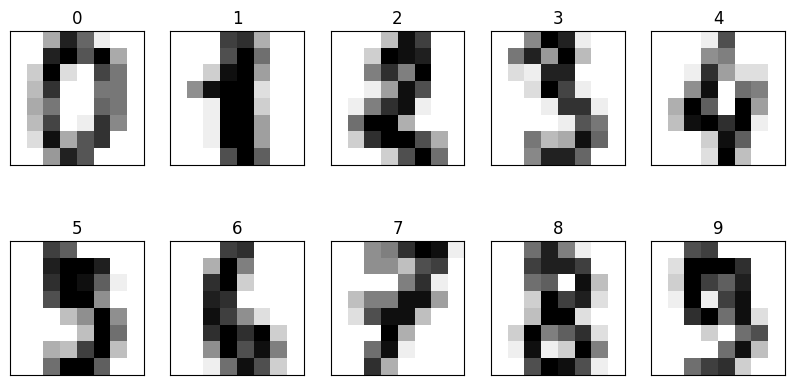

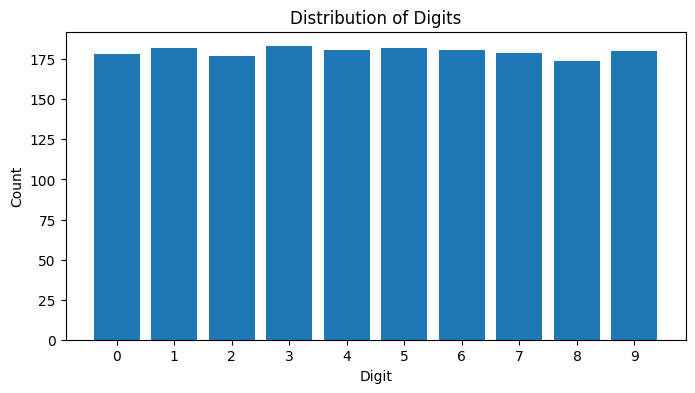

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import numpy as np

# Load the digits dataset
digits = load_digits()

# Display some images with labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5),
                         subplot_kw={'xticks': [], 'yticks': []})
for ax, image, label in zip(axes.flat, digits.images, digits.target):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(label)
plt.show()

# Display the distribution of classes
class_distribution = np.bincount(digits.target)
plt.figure(figsize=(8, 4))
plt.bar(range(len(class_distribution)), class_distribution)
plt.xticks(range(len(class_distribution)))
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Distribution of Digits')
plt.show()

### 2. Prétraitement

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(digits.data)
y = digits.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

print("Shape of training data (X_train):", X_train.shape)
print("Shape of testing data (X_test):", X_test.shape)
print("Shape of training labels (y_train):", y_train.shape)
print("Shape of testing labels (y_test):", y_test.shape)


Shape of training data (X_train): (1257, 64)
Shape of testing data (X_test): (540, 64)
Shape of training labels (y_train): (1257,)
Shape of testing labels (y_test): (540,)


### 3. Classification sans ACP

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Train an RBF SVM classifier
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = svm_rbf.predict(X_test)

# Print the classification report
print("Classification Report for RBF SVM on original data:")
print(classification_report(y_test, y_pred))

Classification Report for RBF SVM on original data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       0.97      0.98      0.97        58
           2       1.00      0.98      0.99        51
           3       0.98      1.00      0.99        47
           4       0.96      0.98      0.97        54
           5       1.00      0.98      0.99        52
           6       0.98      1.00      0.99        46
           7       0.98      1.00      0.99        56
           8       1.00      0.96      0.98        55
           9       1.00      0.98      0.99        60

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



### 4. Réduction de dimension avec ACP

In [4]:
from sklearn.decomposition import PCA

# Appliquer l’ACP sur les données d’entraînement
pca = PCA()
pca.fit(X_train)

# Calculer la variance expliquée cumulée
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Choisir k pour expliquer au moins 90% de la variance
k = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Nombre de composantes pour expliquer au moins 90% de la variance : {k}")

# Transformer les données d’entraînement et de test
pca_k = PCA(n_components=k)
X_train_pca = pca_k.fit_transform(X_train)
X_test_pca = pca_k.transform(X_test)

print("Shape de X_train_pca :", X_train_pca.shape)
print("Shape de X_test_pca :", X_test_pca.shape)

Nombre de composantes pour expliquer au moins 90% de la variance : 31
Shape de X_train_pca : (1257, 31)
Shape de X_test_pca : (540, 31)


### 5. Classification après ACP

In [7]:
# Réentraîner le classifieur SVM sur les données réduites par ACP
svm_rbf_pca = SVC(kernel='rbf')
svm_rbf_pca.fit(X_train_pca, y_train)

# Prédire sur le jeu de test réduit
y_pred_pca = svm_rbf_pca.predict(X_test_pca)

# Afficher le rapport de classification
print("Classification Report for RBF SVM after PCA:")
print(classification_report(y_test, y_pred_pca))

Classification Report for RBF SVM after PCA:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       0.92      0.98      0.95        58
           2       1.00      0.96      0.98        51
           3       0.98      1.00      0.99        47
           4       0.98      0.98      0.98        54
           5       1.00      0.98      0.99        52
           6       0.98      1.00      0.99        46
           7       0.97      1.00      0.98        56
           8       0.96      0.91      0.93        55
           9       1.00      0.97      0.98        60

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



### 6. Visualisation

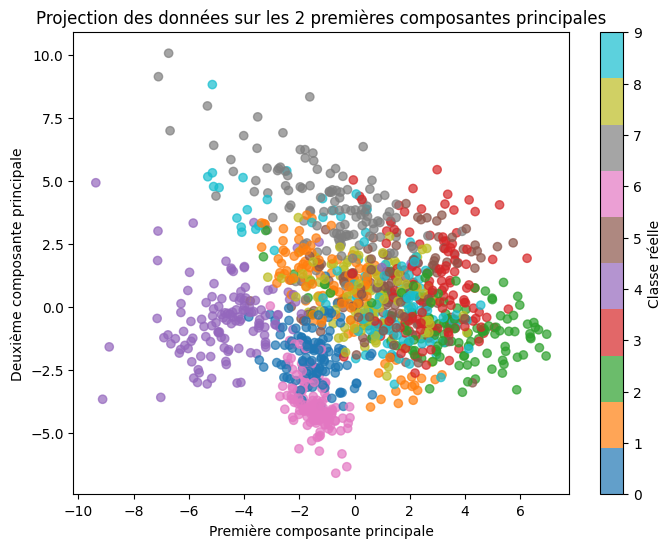

In [8]:
# Réduire les données à 2 composantes principales pour la visualisation
pca_2 = PCA(n_components=2)
X_train_pca2 = pca_2.fit_transform(X_train)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca2[:, 0], X_train_pca2[:, 1], c=y_train, cmap='tab10', alpha=0.7)
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Projection des données sur les 2 premières composantes principales')
plt.colorbar(scatter, label='Classe réelle')
plt.show()